['D:\\gabriel\\Uni\\Master\\gitHub\\micro-cocome-statistics\\measurements/pub_sub_1_to_1_db_distributed\\callBackData\\pub_sub_1_to_1_db_callback_data_2020_09_16.csv']
['D:\\gabriel\\Uni\\Master\\gitHub\\micro-cocome-statistics\\measurements/pub_sub_one_db_distributed\\callBackData\\pub_sub_one_db_distributed_callback_data_2020_09_26.csv']
['D:\\gabriel\\Uni\\Master\\gitHub\\micro-cocome-statistics\\measurements/message_bus_1_to_1_db_distributed\\callBackData\\message_bus_1_to_1_db_distributed_callback_data_2020_09_26.csv']
['D:\\gabriel\\Uni\\Master\\gitHub\\micro-cocome-statistics\\measurements/orchestrate_pub_sub_1_to_1_db\\callBackData\\orchestrate_pub_sub_1_to_1_db_callback_data_2020_09_26.csv']


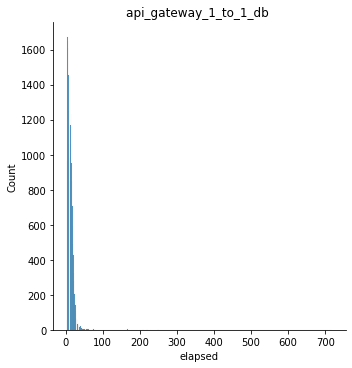

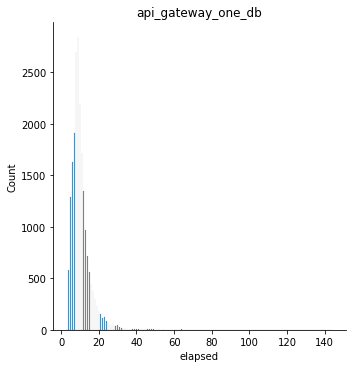

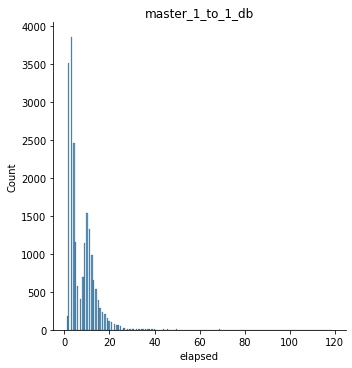

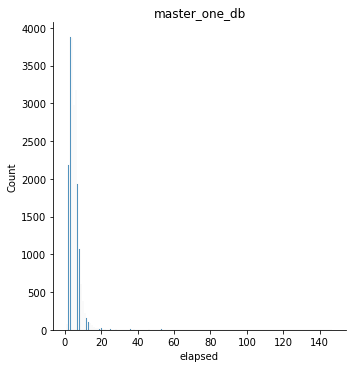

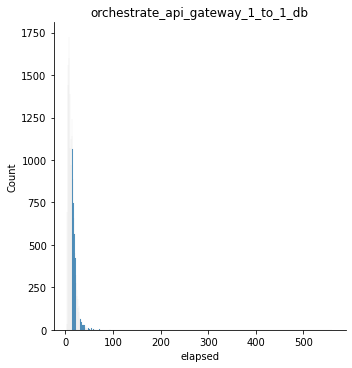

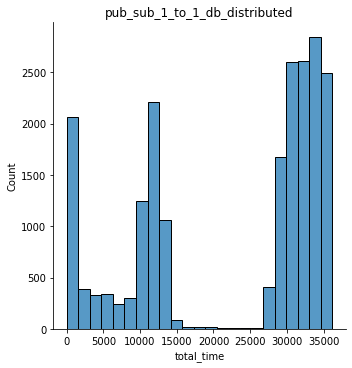

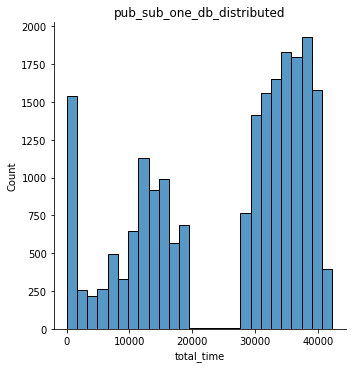

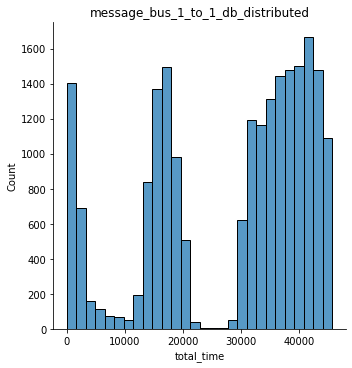

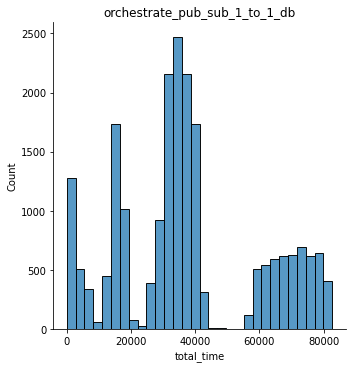

In [2]:
import pandas as pd
from glob import iglob, glob
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt


def get_data_from_csv(absolut_path, dir_name, column_names):
    path = r'{}/{}/*.csv'.format(absolut_path, dir_name)
    file_path = glob(path,  recursive=True)
    print(file_path)
    return pd.read_csv(file_path[0], skipinitialspace=True, usecols=column_names)


def get_data_from_csv_files(absolut_path, dir_name, column_names):
    path = r'{}\{}\*.csv'.format(absolut_path, dir_name)
    return pd.concat((pd.read_csv(f, skipinitialspace=True, usecols=column_names) for f in iglob(path, recursive=True)),
                     ignore_index=True)


def remove_outliers(data_frame):
    z = np.abs(stats.zscore(data_frame['elapsed']))
    return data_frame[(z < 3)]


def get_callback_dir(dir_name, call_back):
    return r'{}\{}'.format(dir_name, call_back)


absolutPath = r'D:\gabriel\Uni\Master\gitHub\micro-cocome-statistics\measurements'
callBack = r'callBackData'

ag1to1 = r'api_gateway_1_to_1_db_distributed'
agOne = r'api_gateway_one_db_distributed'
m1to1 = r'master_1_to_1_db_distributed'
mOne = r'master_one_db_distributed'
oAg1to1 = r'orchestrate_api_gateway_1_to_1_db_distributed'
ps1tot1 = r'pub_sub_1_to_1_db_distributed'
psOne = r'pub_sub_one_db_distributed'
mb1to1 = r'message_bus_1_to_1_db_distributed'
opb1to1 = r'orchestrate_pub_sub_1_to_1_db'

fields = ['elapsed']
fieldsAsync = ['timeStamp', 'uuid']
fieldsAsyncCallback = ['time_received', 'uuid']

# api_gateway_1_to_1_db
apg1 = get_data_from_csv_files(absolutPath, ag1to1, fields)
#prunedApg1 = remove_outliers(apg1)

#sns.displot(prunedApg1, x="elapsed")
sns.displot(apg1, x="elapsed")
plt.title('api_gateway_1_to_1_db ')

# api_gateway_one_db
apgOne = get_data_from_csv_files(absolutPath, agOne, fields)
#prunedApgOne = remove_outliers(apgOne)

#sns.displot(prunedApgOne, x="elapsed")
sns.displot(apgOne, x="elapsed")
plt.title('api_gateway_one_db')

# master_1_to_1_db_distributed
master1 = get_data_from_csv_files(absolutPath, m1to1, fields)
#prunedMaster1 = remove_outliers(master1)

#sns.displot(prunedMaster1, x="elapsed")
sns.displot(master1, x="elapsed")
plt.title('master_1_to_1_db')

# master_one_db_distributed
masterOne = get_data_from_csv_files(absolutPath, mOne, fields)
#prunedMasterOne = remove_outliers(masterOne)

#sns.displot(prunedMasterOne, x="elapsed")
sns.displot(masterOne, x="elapsed")
plt.title('master_one_db')

# orchestrate_api_gateway_1_to_1_db_distributed
oApi1to1 = get_data_from_csv_files(absolutPath, oAg1to1, fields)
prunedOApi1to1 = remove_outliers(oApi1to1)

#sns.displot(prunedOApi1to1, x="elapsed")
sns.displot(oApi1to1, x="elapsed")
plt.title('orchestrate_api_gateway_1_to_1_db')

# pub_sub_1_to_1_db_distributed
pubSub1to1 = get_data_from_csv_files(absolutPath, ps1tot1, fieldsAsync)
pubSub1to1Callback = get_data_from_csv(absolutPath, get_callback_dir(ps1tot1, callBack), fieldsAsyncCallback)

pubSub1to1Aggregate = pubSub1to1.join(pubSub1to1Callback.set_index('uuid'), on='uuid')
pubSub1to1Aggregate['total_time'] = pubSub1to1Aggregate['time_received'] - pubSub1to1Aggregate['timeStamp']
#pubSub1to1Aggregate.to_csv('C:\\Users\\gabriel\\Desktop\\completeData.csv', encoding='utf-8', index=False)
sns.displot(pubSub1to1Aggregate, x='total_time')
plt.title('pub_sub_1_to_1_db_distributed')

# pub_sub_one_db_distributed
pubSubOne = get_data_from_csv_files(absolutPath, psOne, fieldsAsync)
pubSubOneCallback = get_data_from_csv(absolutPath, get_callback_dir(psOne, callBack), fieldsAsyncCallback)

pubSubOneAggregate = pubSubOne.join(pubSubOneCallback.set_index('uuid'), on='uuid')
pubSubOneAggregate['total_time'] = pubSubOneAggregate['time_received'] - pubSubOneAggregate['timeStamp']

sns.displot(pubSubOneAggregate, x='total_time')
plt.title('pub_sub_one_db_distributed')

# message_bus_1_to_1_db_distributed

mbus1to1 = get_data_from_csv_files(absolutPath, mb1to1, fieldsAsync)
mbus1to1Callback = get_data_from_csv(absolutPath, get_callback_dir(mb1to1, callBack), fieldsAsyncCallback)

mbus1to1Aggregate = mbus1to1Callback.join(mbus1to1.set_index('uuid'), on='uuid')
#mbus1to1Aggregate = mbus1to1.join(mbus1to1Callback.set_index('uuid'), on='uuid')
mbus1to1Aggregate['total_time'] = mbus1to1Aggregate['time_received'] - mbus1to1Aggregate['timeStamp']

mbus1to1Aggregate.to_csv('C:\\Users\\gabriel\\Desktop\\completeDataMB1.csv', encoding='utf-8', index=False)

sns.displot(mbus1to1Aggregate, x='total_time')
plt.title('message_bus_1_to_1_db_distributed')
#print(mbus1to1Aggregate)

# orchestrate_pub_sub_1_to_1_db

oPubSub1to1 = get_data_from_csv_files(absolutPath, opb1to1, fieldsAsync)
oPubSub1to1Callback = get_data_from_csv(absolutPath, get_callback_dir(opb1to1, callBack), fieldsAsyncCallback)

oPubSub1to1Aggregate = oPubSub1to1Callback.join(oPubSub1to1.set_index('uuid'), on='uuid')
oPubSub1to1Aggregate['total_time'] = oPubSub1to1Aggregate['time_received'] - oPubSub1to1Aggregate['timeStamp']

sns.displot(oPubSub1to1Aggregate, x='total_time')
plt.title('orchestrate_pub_sub_1_to_1_db')
plt.show()
#print(oPubSub1to1Aggregate)
